In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score


In [3]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', 
                            header=None, sep=' ')

In [4]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14500 entries, 0 to 14499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       14500 non-null  int64
 1   1       14500 non-null  int64
 2   2       14500 non-null  int64
 3   3       14500 non-null  int64
 4   4       14500 non-null  int64
 5   5       14500 non-null  int64
 6   6       14500 non-null  int64
 7   7       14500 non-null  int64
 8   8       14500 non-null  int64
 9   9       14500 non-null  int64
dtypes: int64(10)
memory usage: 1.1 MB


In [5]:
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


# Split the Dataframe into X and Y

In [6]:
X = df_train_data.drop(9, axis=1)
y = df_train_data[9]

In [7]:
y.unique()

array([4, 1, 5, 3, 2, 7, 6], dtype=int64)

# For binary classification, convert y values into 2 classes, the 1 class and the rest as zeros.

In [8]:
y = np.where(y==1,1,0)

# Split into train-test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=675)

# Create a logistic regression model

In [10]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)

In [11]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

# Calculate Acccuracy

In [12]:
lr.score(X_test, y_test)

0.9740689655172414

# Compare to a dummy classifier

In [15]:
dummy = DummyClassifier(strategy = 'most_frequent')

In [16]:
dummy.fit(X_train,y_train)
dummy.score(X_test, y_test)

0.7977931034482758

So my classifier does do better than a dummy

# Print a confusion matrix

In [17]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [18]:
predictions = lr.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, predictions)
cm

array([[ 674,   59],
       [  35, 2857]], dtype=int64)

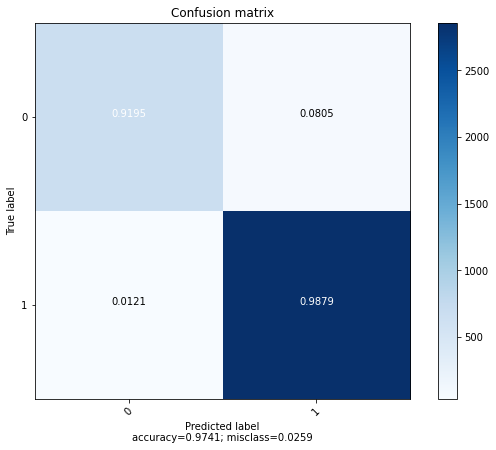

In [29]:
plot_confusion_matrix(cm,target_names=['0','1'])

# Calculate metrics

In [38]:
print("F1 score:",f1_score(y_test,predictions))
print("Fb score favoring precision: ",fbeta_score(y_test,predictions, beta=0.5))
print("Fb score favoring recall: ", fbeta_score(y_test,predictions, beta=2))
print("Precision: ",precision_score(y_test,predictions))
print("Recall: ",recall_score(y_test,predictions))
print("Accuracy: ",accuracy_score(y_test,predictions))

F1 score: 0.9838154269972451
Fb score favoring precision:  0.9813822478702939
Fb score favoring recall:  0.9862607014636842
Precision:  0.9797668038408779
Recall:  0.9878976486860305
Accuracy:  0.9740689655172414
